In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
from statistics import mode
import re
from sklearn.ensemble import RandomForestClassifier

In [ ]:
col_names = ['Pregnancies', 'glucose', 'bp', 'skin','insulin', 'bmi', 'pedigree', 'age', 'label']# load dataset
pima =pd.read_csv("/content/Pima.csv")
pima.head()
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#split dataset in features and target variable
feature_cols = ['Pregnancies', 'Insulin', 'BMI','Age','Glucose','BloodPressure']
X = pima[feature_cols] # Features
y = pima.Outcome # Target variable
X.head()
X.shape

(768, 6)

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [ ]:
RF=RandomForestClassifier(criterion='entropy')

#Using GridSearchCV() to tune hyperparameters:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = [{'n_estimators': [10, 20, 30,40],'max_depth': [2, 3]}]

In [ ]:
grid_search = GridSearchCV(estimator = RF,param_grid = parameters, scoring='accuracy', cv= 3, n_jobs=-1)

In [ ]:
grid_search = grid_search.fit(X_train, y_train)


In [ ]:
grid_search

GridSearchCV(cv=3, estimator=RandomForestClassifier(criterion='entropy'),
             n_jobs=-1,
             param_grid=[{'max_depth': [2, 3],
                          'n_estimators': [10, 20, 30, 40]}],
             scoring='accuracy')

In [ ]:
grid_search.best_params_,grid_search.best_score_

({'max_depth': 3, 'n_estimators': 20}, 0.7541899441340782)

In [ ]:
grid_search.best_estimator_
RF = grid_search.best_estimator_.fit(X_train,y_train)

In [ ]:
y_pred = RF.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[131  15]
 [ 37  48]]
              precision    recall  f1-score   support

           0       0.78      0.90      0.83       146
           1       0.76      0.56      0.65        85

    accuracy                           0.77       231
   macro avg       0.77      0.73      0.74       231
weighted avg       0.77      0.77      0.77       231



0.730983078162772


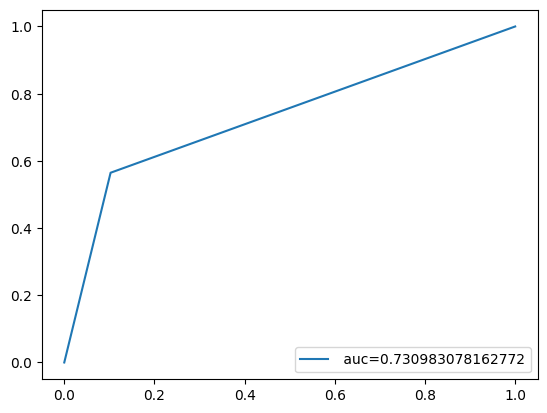

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
fpr_xg, tpr_xg, thresholds = metrics.roc_curve(y_test, y_pred)
print(metrics.auc(fpr_xg, tpr_xg))
auc_xgb = np.trapz(tpr_xg,fpr_xg)
plt.plot(fpr_xg,tpr_xg,label=" auc="+str(auc_xgb))
plt.legend(loc=4)
plt.show()

In [ ]:
feature_imp =pd.Series(RF.feature_importances_,index=feature_cols).sort_values(ascending=False)
feature_imp

Glucose          0.415165
BMI              0.235867
Age              0.138799
Insulin          0.108877
Pregnancies      0.057078
BloodPressure    0.044214
dtype: float64

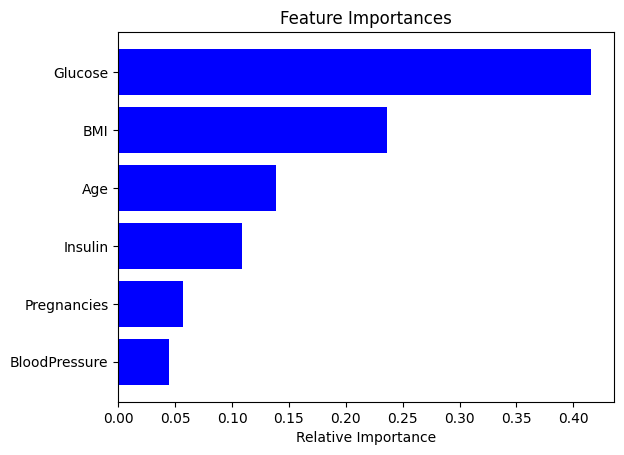

In [ ]:
features = feature_cols
importances = RF.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b',align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()